In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/Projects/task3/insurance.csv')

print(data.shape)

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-6-b5ca8822c898>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-6-b5ca8822c898>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<Axes: >

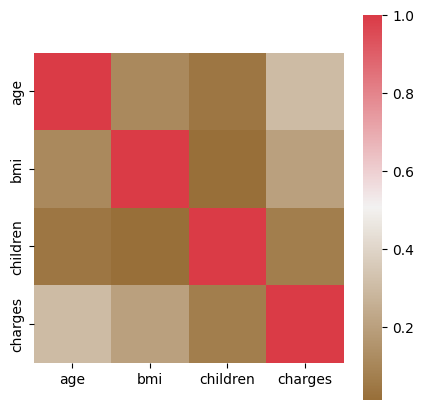

In [6]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (5, 5))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)


In [7]:
# removing unnecassary columns from the dataset

data = data.drop('region', axis = 1)

print(data.shape)

data.columns


(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [8]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [9]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [13]:

# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [15]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**LINEAR REGRESSION**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 37806750.25007655
RMSE : 6148.719399198222
r2 score : 0.7549043319540901


In [17]:
y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [18]:
y_pred

array([34463.03582081,  5351.63285316,  5380.9763682 , 25960.03740848,
       12496.7519736 ,  6408.63819349,  4081.62037308,  9300.34454944,
       32957.30705757, 10937.63104598,  7519.13584334,  9726.30820152,
       34438.32925237, 11046.23596617,   819.90626006, 35368.51634447,
       11430.73775682,  8747.50405981, 28520.23066838, 10780.77269818,
         885.55261833,  8140.91449068,  7686.87521254, 10734.04414171,
       32605.85490348, 38733.33147903, 14385.6266007 ,  2947.77854767,
       10456.87417122, 14224.24201886,  1675.51537561, 30193.11285619,
         944.28091937, 14459.05536274, 12261.67368565,  8411.64973742,
        1863.86250159,  6487.85043844,   186.61387983,  8192.76868362,
        6366.87004436, 33513.53920691,  2007.49195393, 13551.24985198,
       10145.95016308, 29556.16908321,  4878.71697149,  2536.59789849,
        2321.4068302 ,  4974.23941116, 10987.31701618, 12416.97110239,
       11958.11247547,   878.6345611 , 10867.31696491,  7014.47673418,
      

**DECISION FOREST**

In [19]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 39429419.77059114
RMSE : 6279.284972876381
r2 score : 0.7443848012481296


**SUPPORT VECTOR MACHINE**

In [20]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 174595630.81989565
RMSE : 13213.46399775228
r2 score : -0.13187810353027452
